In [2]:
from base64 import b64encode
import time
import requests
import pandas as pd
import numpy as np
KUCOIN_KEY = "63f101fe9ba1f40001e33e5e"
KUCOIN_SECRET = "946b7a71-0f19-4e30-a1b4-03b0f32a8e76"


KUCOIN_URL = "https://api.kucoin.com/api/v2/symbols"
sign = str(time.time()) + "GET" + "/api/v"
headers = {
    "KC-API-KEY" : KUCOIN_KEY,
    "KC-API-SIGN" : "",
    "KC-API-TIMESTAMP": "",
    "KC-API-PASSPHRASE" : "",
    "KC-API-KEY": "",
}
data = requests.get(KUCOIN_URL).json()['data']


In [23]:
data = requests.get('https://api.kucoin.com/api/v1/market/allTickers').json()['data']['ticker']
len(data),data[0]

(1302,
 {'symbol': 'NKN-USDT',
  'symbolName': 'NKN-USDT',
  'buy': '0.120822',
  'sell': '0.120998',
  'changeRate': '-0.0112',
  'changePrice': '-0.001375',
  'high': '0.129999',
  'low': '0.120543',
  'vol': '1270240.5995',
  'volValue': '157010.952664778',
  'last': '0.121012',
  'averagePrice': '0.12309428',
  'takerFeeRate': '0.001',
  'makerFeeRate': '0.001',
  'takerCoefficient': '1',
  'makerCoefficient': '1'})

In [196]:

df = pd.DataFrame.from_dict(data)
df
df['tickers'] = df.symbol.str.split('-').apply(lambda x:x[0])
df.volValue = df.volValue.astype(float)
tickers = df.sort_values('volValue',ascending=False)['tickers'][:100]


96

In [44]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
tokens = pd.DataFrame(cg.get_coins_list())
tokens.symbol = tokens.symbol.apply(str.upper)



In [46]:
## THIS TAKES LIKE AN HOUR LMAO
from tenacity import retry,wait_exponential

@retry(wait=wait_exponential(multiplier=0.5, min=3, max=6))
def get_price_from_id(t_id,start,end):
    print(f'getting {t}')
    res = requests.get(
            COINGECKO_PRICE_URL.format(
                t_id,
                year_ago,
                today
            )
        )
    if res.status_code == 429:
        raise Exception
    elif res.status_code == 200:
        print('got t')
        return(t,res.json()['prices'])

tkns = set(tokens['symbol'].str.upper())
columns = []
values = []

today = time.time()
year_ago = today - (60 * 60 * 60 * 24 * 365)
COINGECKO_PRICE_URL = 'https://api.coingecko.com/api/v3/coins/{}/market_chart/range?vs_currency=usd&from={}&to={}'
for t in tickers:
    if t in tkns:
        t_id = tokens[tokens.symbol==t]['id'].values[0]
        res = get_price_from_id(t_id,year_ago,today)
        if type(res) == tuple:
            (a,b) = res
            columns.append(a)
            values.append(b)

getting BTC
got t
getting ETH
got t
getting BLUR
got t
getting FTM
got t
getting MATIC
got t
getting VRA
got t
getting SOL
getting SOL
getting SOL
getting SOL
getting SOL
getting SOL
getting SOL
getting SOL
getting SOL
getting SOL
getting SOL
got t
getting XRP
got t
getting VELO
got t
getting SHIB
got t
getting AGIX
got t
getting FIL
getting FIL
getting FIL
getting FIL
getting FIL
getting FIL
getting FIL
getting FIL
getting FIL
getting FIL
got t
getting LDO
got t
getting BNB
got t
getting LINK
got t
getting CFX
got t
getting USDC
got t
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
getting DOT
got t
getting GRT
got t
getting ADA
got t
getting DOGE
got t
getting NEAR
got t
getting RNDR
getting RNDR
getting RNDR
getting RNDR
getting RNDR
getting RNDR
getting RNDR
getting RND

In [48]:
columns,values,len(columns)

(['BTC',
  'ETH',
  'BLUR',
  'FTM',
  'MATIC',
  'VRA',
  'SOL',
  'XRP',
  'VELO',
  'SHIB',
  'AGIX',
  'FIL',
  'LDO',
  'BNB',
  'LINK',
  'CFX',
  'USDC',
  'DOT',
  'GRT',
  'ADA',
  'DOGE',
  'NEAR',
  'RNDR',
  'FLOKI',
  'BTC',
  'HFT',
  'JASMY',
  'APT',
  'EOS',
  'USDT',
  'LTC',
  'AVAX',
  'TON',
  'XMR',
  'HIFRIENDS',
  'INJ',
  'TRX',
  'OP',
  'MOVR',
  'ALGO',
  'LUNC',
  'ETH',
  'ZIL',
  'ICP',
  'SAND',
  'ACH',
  'DYDX',
  'FLOW',
  'FLUX',
  'XCN',
  'VET',
  'ATOM',
  'BUSD',
  'XLM',
  'GLMR',
  'HBAR',
  'RSR',
  'EWT',
  'KDA',
  'ROSE',
  'AZERO',
  'APE',
  'OCEAN',
  'FXS',
  'CRV',
  'THETA',
  'ASTR',
  'DFYN',
  'MANA',
  'AR',
  'LUNA',
  'HIENS3',
  'LOOKS',
  'MASK',
  'SFUND',
  'ELON',
  'UNI',
  'LRC',
  'WOO',
  'VRA',
  'QNT',
  'EGLD',
  'FT',
  'TRIAS',
  'ACS',
  'ONE',
  'MAGIC',
  'XDB',
  'KSM',
  'AUDIO',
  'MJT',
  'KCS',
  'HIRENGA',
  'GMT',
  'COCOS',
  'IGU',
  'USTC',
  'PYR'],
 [[[1367107200000, 135.3],
   [1367193600000, 141.96

In [580]:
from collections import Counter
import datetime


values[0][0],values[1][0]
df = pd.DataFrame.from_records(values[0],columns=['ts','price'])
pd.to_datetime(df.ts,unit='ms')

longest_row =  max(values,key=len)
longest_row = np.stack(longest_row,axis=0)
nans = np.stack([longest_row[:,0],np.array([np.nan] * len(longest_row))],axis=1)
size = len(longest_row)

res = []
for value in values:
    if len(value) < len(longest_row):
        if len(value) == 0:
            res.append(nans.copy())
            continue
        res.append(np.concatenate([nans[:(size - len(value))],np.array(value)],axis=0))
    else:
        res.append(np.array(value))
res = [r[:,1] for r in res]
prices_df = pd.DataFrame(res).T
prices_df.columns = columns
prices_df.index = pd.to_datetime(nans[:,0],unit='ms')
shorter = prices_df[prices_df.index > pd.Timestamp(2022,9,20)]
shorter = shorter.dropna(axis=1).T.drop_duplicates(keep='first').T.drop(['BUSD','USDT'],axis=1)
shorter_no_na = shorter.copy()
shorter_no_na.head()

,BTC,ETH,FTM,MATIC,VRA,SOL,XRP,VELO,SHIB,AGIX,...,MAGIC,XDB,KSM,AUDIO,MJT,KCS,GMT,COCOS,USTC,PYR
2022-01-21,40707.682414,3015.588778,2.705412,1.957837,0.025983,128.569485,0.721097,0.060566,0.000026,0.152972,...,2.389538,0.320601,239.307018,1.190839,1.392273,19.507135,0.292350,1.607921,1.001039,10.834933
2022-01-22,36508.799790,2564.343342,2.278786,1.701186,0.021787,111.775428,0.632813,0.047189,0.000022,0.131777,...,1.738107,0.294092,213.668406,0.993414,1.206057,16.802054,0.256762,1.414701,0.999718,9.072709
2022-01-23,35180.435463,2407.377852,1.967816,1.531601,0.019685,94.515411,0.597812,0.043154,0.000021,0.137280,...,1.598271,0.303170,190.038458,0.884457,1.114568,15.112526,0.246957,1.195802,1.004722,8.062652
2022-01-24,36306.409440,2537.836728,2.257639,1.612004,0.020728,99.691622,0.624532,0.091521,0.000022,0.142750,...,1.638539,0.334696,191.319832,0.937046,1.147189,15.914484,0.237388,1.189697,1.000264,8.510191
2022-01-25,36774.007142,2447.831512,2.255550,1.508390,0.019874,91.915411,0.614857,0.073334,0.000021,0.131938,...,1.217270,0.339911,175.414999,0.846587,1.090292,15.631477,0.247260,1.098665,1.002868,8.053479


In [581]:
for c in shorter_no_na.columns:
    shorter_no_na[c] = np.log10(shorter_no_na[c] + 0.001)
    shorter_no_na[c] = shorter_no_na[c]/shorter_no_na[c][0]
shorter_no_na.head()

,BTC,ETH,FTM,MATIC,VRA,SOL,XRP,VELO,SHIB,AGIX,...,MAGIC,XDB,KSM,AUDIO,MJT,KCS,GMT,COCOS,USTC,PYR
2022-01-21,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2022-01-22,0.989744,0.979768,0.827704,0.791125,1.046784,0.971177,1.400516,1.087879,1.000611,1.079154,...,0.634952,1.075828,0.979312,-0.031920,0.567411,0.949755,1.105458,0.730974,0.352213,0.925516
2022-01-23,0.986252,0.971883,0.680410,0.635035,1.073577,0.936641,1.574983,1.119246,1.000843,1.057451,...,0.538770,1.049119,0.957917,-0.693183,0.329752,0.914084,1.137078,0.377768,2.800410,0.875989
2022-01-24,0.989220,0.978471,0.818344,0.711085,1.059959,0.947619,1.440906,0.853880,1.000581,1.036714,...,0.567303,0.962189,0.959144,-0.364430,0.416656,0.931488,1.169169,0.367014,0.620060,0.898657
2022-01-25,0.990425,0.973964,0.817414,0.612338,1.071052,0.930897,1.488782,0.932395,1.000740,1.078507,...,0.226538,0.948599,0.943300,-0.942246,0.263413,0.925448,1.136083,0.199775,1.895007,0.875512


In [572]:
rough_cointegration_values = []
for i,c in enumerate(shorter_no_na.columns):
    for c1 in shorter_no_na.columns[i + 1:]:
        diff = np.sum(np.square(shorter_no_na[c] - (shorter_no_na[c1])))
        rough_cointegration_values.append((diff,c,c1))
coints = pd.DataFrame(rough_cointegration_values,columns=['rough_coint','ticker_A','ticker_B'])
coints = coints[coints['rough_coint'] != 0.0]
top_20 = coints.sort_values('rough_coint',ascending=False)

In [573]:
from statsmodels.tsa.stattools import adfuller



def adfuller_residuals(a,b):
    data = shorter_no_na[[a,b]]
    X = np.vstack([np.ones(len(data)),data[a]]).T
    y = data[b].T
    mu, gamma = np.dot(np.linalg.pinv(X),y)
    residuals:pd.DataFrame = data[a] - gamma * data[b] - mu
    return adfuller(residuals,regression='ct')[1],residuals

def adfuller_df(a,b):
    pass
     

coint = []
adfuller_residuals(a,b)
for i,(_,a,b) in top_20.iterrows():
    coint.append(adfuller_residuals(a,b)[0])
top_20['c'] = coint


In [574]:
top_resid = top_20.sort_values('c')
top_resid.head(20)

,rough_coint,ticker_A,ticker_B,c
1313,47.808989,JASMY,ACH,0.000394
1312,500.655140,JASMY,ICP,0.000763
2108,998.166381,GLMR,ASTR,0.000867
298,55.141541,VRA,JASMY,0.001060
685,514.081764,FIL,JASMY,0.001246
1011,0.741805,DOT,AR,0.001636
1326,485.948697,JASMY,FXS,0.001697
2375,3573.455936,DFYN,MANA,0.002177
1456,9.430419,AVAX,MOVR,0.002423
1304,404.213556,JASMY,AVAX,0.003606


18 18


0.029711730057081234

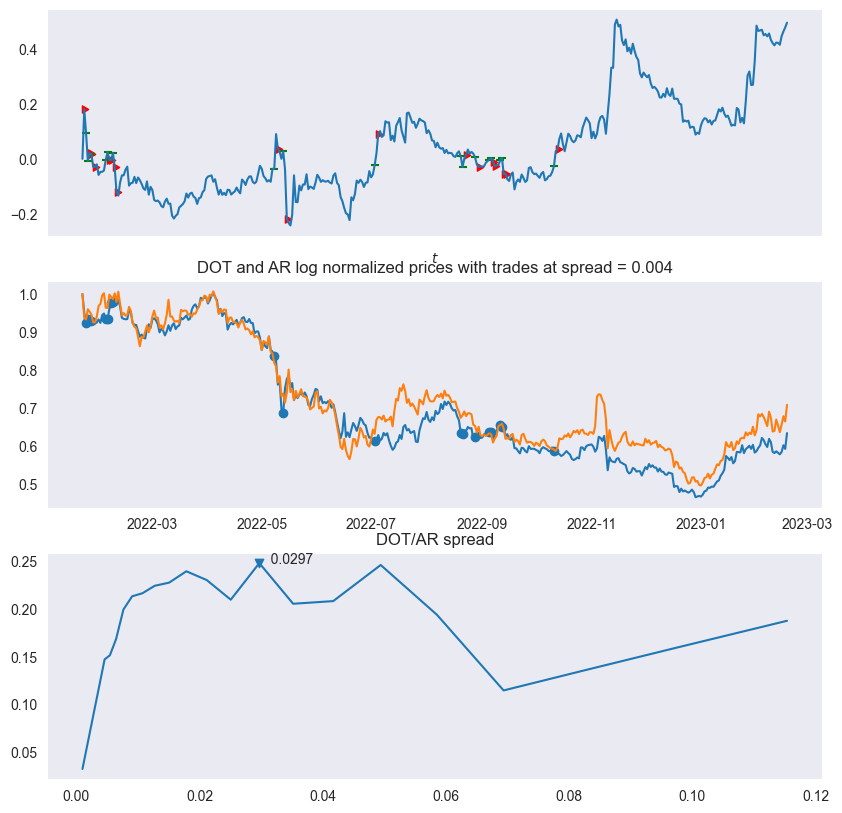

In [677]:
from scipy import stats
import matplotlib.pyplot as plt
a, b = 'DOT', 'AR'

def cdf_profit_plot(a,b,spread,ax,min_trades=1,min_exits=1):
    a1, b1 = shorter_no_na[a], shorter_no_na[b]
    spread = a1 - b1
    thresholds = np.geomspace(0.001, max(abs(spread)), 30)
    cdfs = []
    plots = []
    for threshold in thresholds:
        profit,trades,exits = profit_check(spread,threshold)
        if len(trades) >= min_trades and len(exits) >= min_exits:
            plots.append(threshold)
            cdfs.append(stats.norm.cdf(1-threshold) * threshold * len(trades))
    if len(cdfs) ==0:
        return -1
    ax.plot(plots, cdfs)
    top = np.argmax(cdfs)
    
    ax.scatter(plots[top], max(cdfs), marker='v')
    ax.annotate(f'   {plots[top]:.4f}', xy=(plots[top], max(cdfs)))
    ax.set_title(f'{a}/{b} spread')
    return plots[top]
    
    


def cmp(a, b):
    return (a > b) ^ (a < b)


def check_zero_crossing(p1, p2):
    return (p1 < 0 and p2 > 0) or (p1 > 0 and p2 < 0)


def profit_check(df, s):
    openLeg = 0.0
    profit = 0.0
    trades = []
    exits = []
    prev = cmp(df[0], 0)
    for i, spread in enumerate(df):
        if (spread > s or spread < -s) and openLeg == 0.0:
            openLeg = spread
            trades.append(i)
        if check_zero_crossing(prev, spread):
            exits.append(i-1)
            profit += abs(openLeg)
            openLeg = 0.0
        prev = spread
    return profit, trades, exits


s = 0.004


def spread_entry_plot(test_data, s, ax):
    profit, trades, exits = profit_check(test_data, s)
    ax.set_xticklabels([])
    ax.tick_params(bottom=False)
    ax.set_xlabel(r'$t$')
    ax.plot(range(len(test_data)), test_data)
    print(len(trades),len(exits))
    ax.scatter(trades, test_data[trades], marker=(3, 0, 270), c='red')
    ax.scatter(exits, test_data[exits], marker='_', c='green')
    plt.title('Spread entrypoints to max profit')


fig, ax = plt.subplots(3, 1)
spread_entry_plot(spread, s, ax[0])
profit, trades, exits = profit_check(spread, s)
ax[1].plot(shorter_no_na.index, a1)
ax[1].plot(shorter_no_na.index, b1)
ax[1].scatter(shorter_no_na.index[exits],a1[exits])
ax[1].set_title(
    f'{a} and {b} log normalized prices with trades at spread = {s}')
cdf_profit_plot(a,b,spread,ax[2])


34

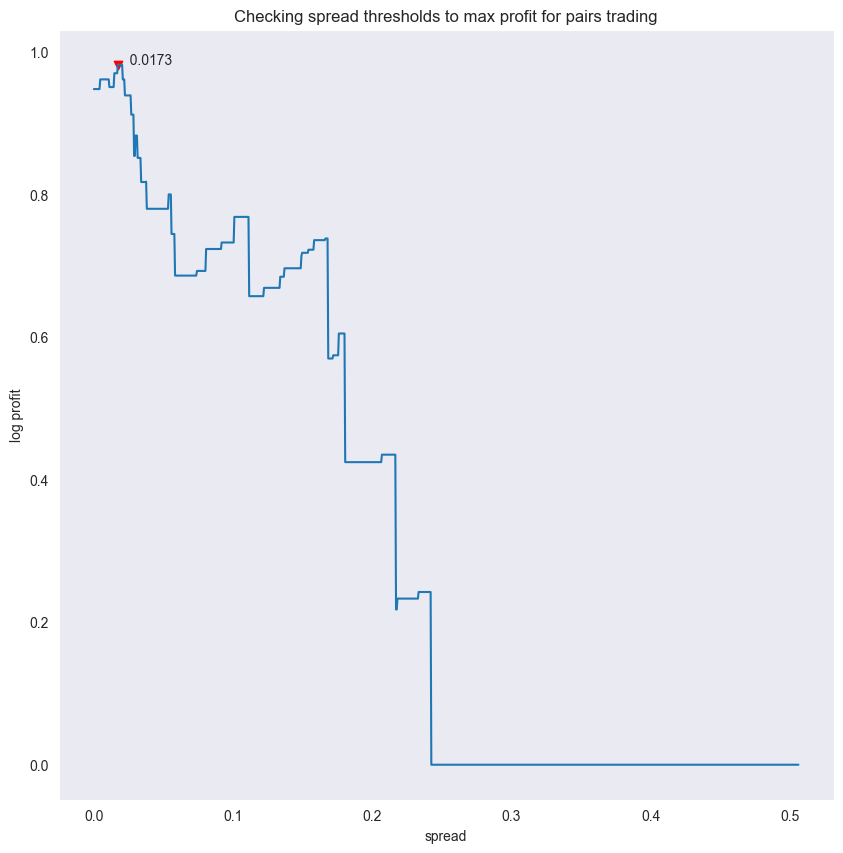

In [645]:
def spread_threshold_plt(test_data, min_trades=1, min_exits=1):
    max_spread = max(test_data.abs())
    tests = np.linspace(0.0001, max_spread, 1000)
    profits = [profit_check(test_data, t) for t in tests]
    plays = []
    inds = []
    for i,p in enumerate(profits):
         if len(p[1]) >= min_trades and len(p[2]) >= min_exits:
            plays.append(p)
            inds.append(tests[i])
    profits, trades, exits= zip(*plays)
    fig, ax = plt.subplots()
    ax.set_title("Checking spread thresholds to max profit for pairs trading")
    ax.set_ylabel('log profit')
    ax.set_xlabel('spread')
    ax.plot(inds, profits)
    top= np.argmax(profits)
    ax.scatter(tests[top], max(profits), marker='v', c='r')
    plt.annotate(f'   {tests[top]:.4f}', xy=(tests[top], max(profits)))
    return top
spread_threshold_plt(spread)


hh
53.50220303969323
[5 3 4 2 1 0]


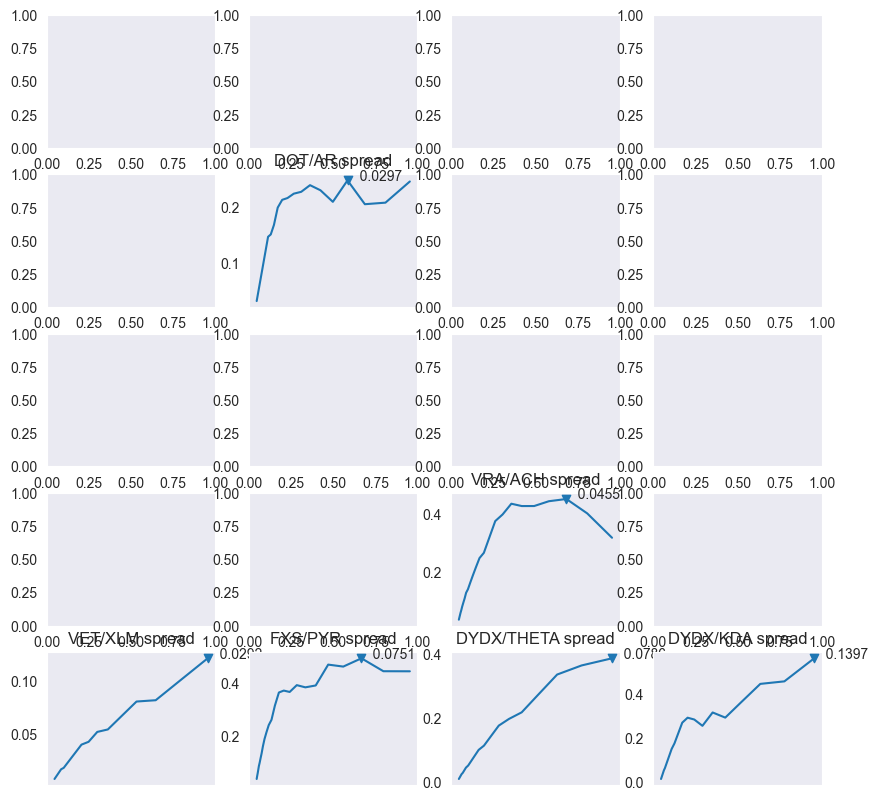

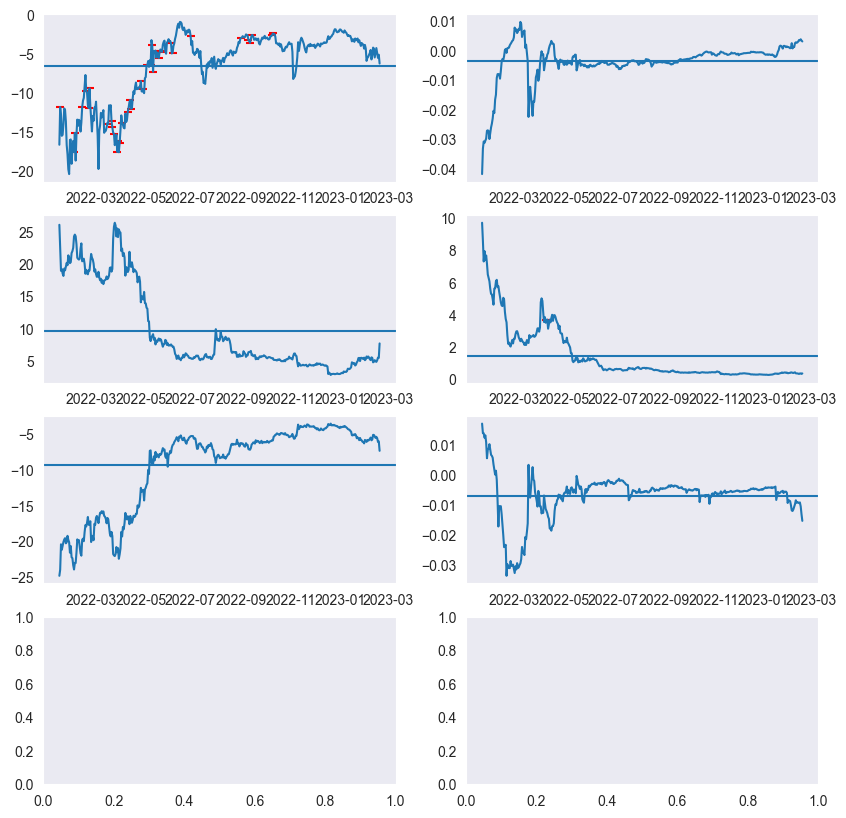

In [696]:
import seaborn as sns

def sim_actual_long_short(a,b,spread,s):
    profit, trades, exits = profit_check(spread, s)
    real_a,real_b = shorter[a],shorter[b]
    short = long = 0.0
    prof = 0.0
    for trade in trades:
        curr = spread[trade]
        if curr < 0:
            l,r = real_a,real_b
        elif curr > 0:
            l,r = real_b,real_a
        short = l[trade]
        long = r[trade]
        i = trade
        while(i < len(spread) and spread[i] < 0):
            i += 1
        if i == len(spread):
            break
        prof += (short - l[i]) + (long + (r[i] - long))
    return prof


fig,ax = plt.subplots(5,4)
ax = np.ravel(ax)
print('hh')
profs = []
trades = []
top_20_resid = top_resid.head(20).reset_index(drop=True)
for i,(_,a,b,_) in top_20_resid.iterrows():
    spread = (shorter_no_na[a] - shorter_no_na[b])
    trade = cdf_profit_plot(a,b,abs(spread),ax[i],5,5)
    if trade == -1:
        continue
    trades.append(trade)
    ax[i].set_xticklabels([])
    profs.append(sim_actual_long_short(a,b,shorter[a] - shorter[b],trade))
top_profits = np.argsort(profs)[::-1]
print(profs[top_profits[0]])
print(top_profits)

fig,ax = plt.subplots(4,2)
for i,(axs,ind) in enumerate(zip(np.ravel(ax),top_profits[:8])):
    a,b = top_20_resid.loc[ind][1:3]
    spread = shorter[a] - shorter[b]
    axs.plot(shorter.index,spread)
    profit,tds,exits = profit_check(shorter_no_na[a] - shorter_no_na[b],trades[ind])
    axs.scatter(shorter.index[exits],spread[exits],c='r',marker='_')
    axs.axhline(spread.mean())
    




    
    
    







In [621]:
top_20_resid.loc[1,1]

500.6551401572868